Path to model files: /root/.cache/kagglehub/models/bruce0000/cat-vs-dog/keras/default/1
Preprocessed image shape: (1, 128, 128, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


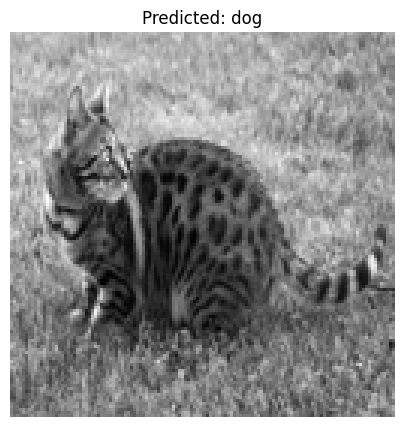

In [3]:
import kagglehub

# Download latest version
path = kagglehub.model_download("bruce0000/cat-vs-dog/keras/default")

print("Path to model files:", path)

import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.api.models import load_model

loaded_model = load_model("/root/.cache/kagglehub/models/bruce0000/cat-vs-dog/keras/default/1/cat_vs_dog_new.keras")  # Replace with your model's path
data = "/content/Pictures/macska.jpg"

def preprocess_image(img_path, new_size=(128, 128)):
    img = Image.open(img_path)  # Open the image
    img = img.convert('L')  # Convert to grayscale
    img = img.resize(new_size)  # Resize the image
    img_array = np.array(img) / 255.0  # Normalize the image to [0, 1] range
    img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension
    return img_array


if os.path.isfile(data):
    preprocessed_image = preprocess_image(data)  # Process the image
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  # Add batch dimension

    # Print the input shape
    print("Preprocessed image shape:", preprocessed_image.shape)  # Should be (1, 128, 128, 1)

    # Make predictions
    predictions = loaded_model.predict(preprocessed_image)  # Directly use the preprocessed image

    # Convert prediction results to labels
    predicted_label = int(predictions[0][0] < 0.5)  # Use 0.5 as the threshold
    pred_label_text = 'dog' if predicted_label == 0 else 'cat'  # Prediction label

    # Display the image and prediction result
    plt.figure(figsize=(5, 5))
    plt.imshow(preprocessed_image[0].reshape(128, 128), cmap='gray')  # Remove batch dimension
    plt.title(f'Predicted: {pred_label_text}')
    plt.axis('off')
    plt.show()
else:
    print("File does not exist, please check the path.")
